<a href="https://colab.research.google.com/github/stephanienguyn/Capstone-Project/blob/main/Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GoogleStockPrice_Train.csv to GoogleStockPrice_Train.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("GoogleStockPrice_Train.csv")
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [ ]:
df['Volume']=df['Volume'].apply(lambda x: x.replace(',', ''))
df['Close']=df['Close'].apply(lambda x: x.replace(',', ''))

for x in df.loc[:, df.columns != 'Date']:
  df[x]=df[x].astype(float)
df['Date']=df['Date'].astype('datetime64[ns]')
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [ ]:
df['Year']=df['Date'].dt.year
result=df.groupby('Year').sum()
result

<ipython-input-5-896b27e78e87>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result=df.groupby('Year').sum()


,Open,High,Low,Close,Volume
Year,,,,,
2012,80048.76,80732.02,79322.06,160264.24,1.307043e+09
2013,110920.35,111738.70,110178.81,222219.08,1.055967e+09
2014,141298.83,142252.79,139900.92,174991.07,6.267335e+08
2015,151718.45,153075.55,150214.86,151705.40,5.214463e+08
2016,187420.58,188854.26,185874.67,187358.65,4.617083e+08


Text(0, 0.5, 'Volume')

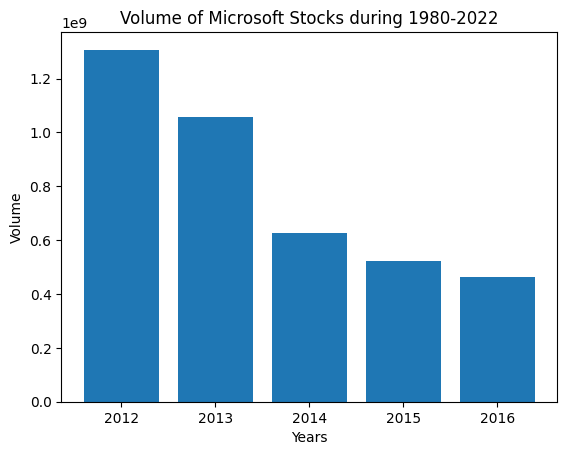

In [ ]:
years= range(2012,2017)
plt.bar(years, result['Volume'])
plt.title('Volume of Microsoft Stocks during 1980-2022')
plt.xlabel('Years')
plt.ylabel('Volume')

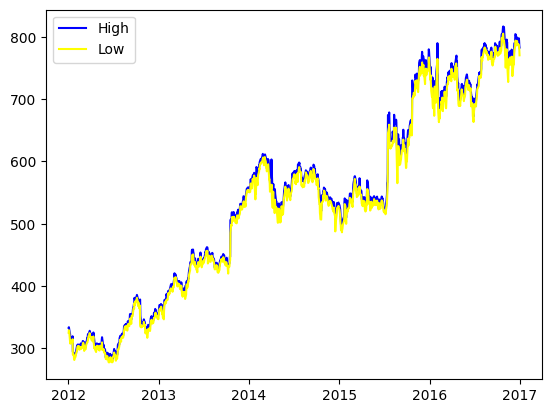

In [ ]:
import datetime
fig,all_plot=plt.subplots()
all_plot.plot(df['Date'],df['High'],c='blue',label="High")
all_plot.plot(df['Date'],df['Low'],c='yellow',label="Low")
plt.legend(['High', 'Low'])

Text(0, 0.5, 'Difference($)')

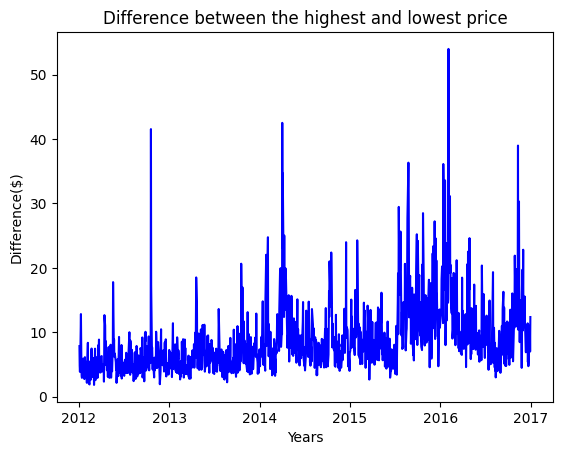

In [ ]:
df['Difference']=df['High']-df['Low']
dates=df['Date'].unique()
plt.plot(dates,df['Difference'],color='blue')
plt.title('Difference between the highest and lowest price')
plt.xlabel('Years')
plt.ylabel('Difference($)')
